In [6]:
import numpy as np
import numpy.random as rnd
import pylab
%matplotlib inline

In [7]:
points = dict()
for i in range(1,201,1):
    points[i] = rnd.uniform(-1,1,([100,i]))
print len(points[200][99])
    

200


In [8]:
def calculate_distance_between_two_points(point1, point2):
    dimension = len(point1)
    distance = 0.0
    for i in range(dimension):
        distance += (point1[i] - point2[i])**2
    distance = distance**(0.5)
    return distance
    

def calculate_min_max(point):
    dimension = len(point)
    min_value = None
    max_value = None
    arr = points[dimension]
    for i in arr:
        if np.array_equal(i,point):
            continue
        res = calculate_distance_between_two_points(i, point)
        if min_value is None:
            min_value = res
        if max_value is None:
            max_value = res
        if res < min_value:
            min_value = res
        if res > max_value:
            max_value = res
    return [min_value, max_value]
    
    
calculate_min_max([0.5,0.5, 0.5])

[0.12953555861266927, 2.2745180187141258]

In [22]:
av_mins = list()
av_maxs = list()
for i in range(1,201,1):
    cur_points = points[i]
    sum_of_mins = 0.0
    sum_of_maxs = 0.0
    for point in cur_points:
        res = calculate_min_max(point)
        sum_of_mins += res[0]
        sum_of_maxs += res[1]
    av_mins.append(sum_of_mins/100)
    av_maxs.append(sum_of_maxs/100)

    

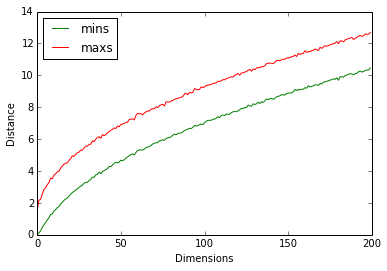

In [23]:
pylab.plot(av_mins, c = 'g', label = 'mins')
pylab.plot(av_maxs, c= 'r', label='maxs' )
pylab.xlabel('Dimensions')
pylab.ylabel("Distance")
pylab.legend(loc='best')

In [24]:
av_ratio = list()
for i in range(len(av_maxs)):
    av_ratio.append(av_maxs[i]/av_mins[i])


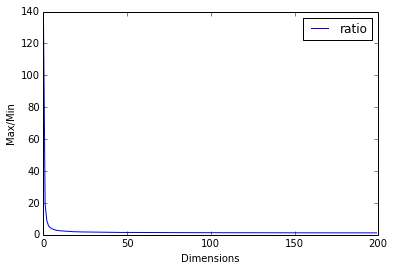

In [25]:
pylab.plot(av_ratio, c = 'b', label = 'ratio')
pylab.xlabel('Dimensions')
pylab.ylabel("Max/Min")
pylab.legend(loc='best')

In this case, the curse of the dimension is exactly the case since: for large dimensions, already "close points" are at a relatively large distance. As a consequence of the curse of dimensionality, we need a larger sample in order for us to draw some conclusions, and in this case, the distance between points with large dimensions gives us very little information.

In [10]:
import sklearn
import sklearn.neighbors as skl_kNN
import sklearn.tree as skl_decTree
arr1 = rnd.multivariate_normal([1,1], np.eye(2), 100)
arr2 = rnd.multivariate_normal([3,3], np.eye(2), 100)

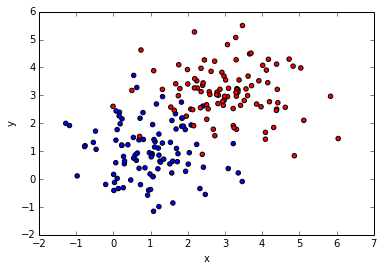

In [11]:
pylab.scatter(arr1[:,0], arr1[:,1], c='b')
pylab.scatter(arr2[:,0], arr2[:,1], c='r')
pylab.xlabel('x')
pylab.ylabel('y')

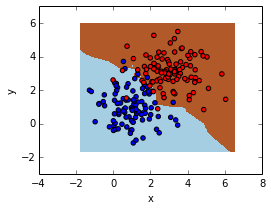

In [12]:
arr = np.concatenate((arr1,arr2))
labels = np.concatenate((np.zeros(100), np.ones(100)))
knn_cl = skl_kNN.KNeighborsClassifier()
knn_cl.fit(arr, labels)

dectree_cl = skl_decTree.DecisionTreeClassifier()
dectree_cl.fit(arr,labels)

h = .02
x_min, x_max = arr[:,0].min() - .5, arr[:,0].max() + .5
y_min, y_max = arr[:,1].min() - .5, arr[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_cl.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

pylab.figure(1, figsize=(4, 3))
pylab.set_cmap(pylab.cm.Paired)
pylab.pcolormesh(xx, yy, Z)
#Color dots
pylab.scatter(arr[:len(arr1), 0], arr[:len(arr1),1], c='b') 
pylab.scatter(arr[len(arr1):, 0], arr[len(arr1):,1], c='r')
pylab.xlabel('x')
pylab.ylabel('y')

The decision surface looks like this, since the bottom points on the left are dominated by blue dots, and the red ones on the top-right. In consequence of this, it turns out that the nearest neighbors method would assign the bottom left  points to the class of blue, and the upper right to the red class. And on the very border there would be points, which classification is ambiguous.

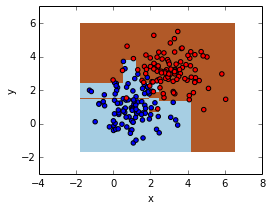

In [13]:
W = dectree_cl.predict(np.c_[xx.ravel(), yy.ravel()])
W = W.reshape(xx.shape)
pylab.figure(1, figsize=(4, 3))
pylab.set_cmap(pylab.cm.Paired)
pylab.pcolormesh(xx, yy, W)
pylab.scatter(arr[:len(arr1), 0], arr[:len(arr1),1], c='b') 
pylab.scatter(arr[len(arr1):, 0], arr[len(arr1):,1], c='r')
pylab.xlabel('x')
pylab.ylabel('y')

The Decision surface for the Decision Tree looks like this, because at each node in which the points are divided, we compare the value from one dimension to the constant. Such a partitioning  causes appearances in the Decision surface lines parallel to the axes.

In [23]:
import pandas as pd
data = pd.read_csv('adult_data_small.csv')
data
temp = data['salary']
y = list()
for i in range(len(temp)):
    if temp[i] == '<=50K':
        y.append(0)
    if temp[i] == '>50K':
        y.append(1)
x1 = data.drop(['workclass','education','marital-status','occupation','relationship','race','sex',
           'native-country','salary'],1)
data.drop(['salary'],1,inplace=True)
x2 = pd.get_dummies(data)
x1_train,x1_test,x2_train,x2_test,y_train,y_test = sklearn.cross_validation.train_test_split(x1,x2,y,test_size = 0.3)

In [24]:
print len(x1_train)
print len(x1_test)
print len(x2_train)
print len(x2_test)

7000
3000
7000
3000


In [25]:
scaler_x1 = sklearn.preprocessing.StandardScaler()
scaler_x1.fit(x1_train)
trans_x1_train = scaler_x1.transform(x1_train)
trans_x1_test =  scaler_x1.transform(x1_test)

scaler_x2 = sklearn.preprocessing.StandardScaler()
scaler_x2.fit(x2_train)
trans_x2_train = scaler_x2.transform(x2_train)
trans_x2_test = scaler_x2.transform(x2_test)

dectree_cl = skl_decTree.DecisionTreeClassifier()
dectree_cl.fit(x1_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [26]:
print "kNN"
best = 0.0
neighbors = 0
for i in range(1,51,1):
    knn_cl = skl_kNN.KNeighborsClassifier(n_neighbors = i)
    knn_cl.fit(x1_train, y_train)
    s = knn_cl.score(x1_test, y_test)
    if s > best:
        best = s
        neighbors = i
        
        
print "x1_test (without categorical):"
print "Score: {0}".format(best)
print "Neighbors: {0}".format(neighbors)

best = 0.0
neighbors = 0
for i in range(1,51,1):
    knn_cl = skl_kNN.KNeighborsClassifier(n_neighbors = i)
    knn_cl.fit(x2_train, y_train)
    s = knn_cl.score(x2_test, y_test)
    if s > best:
        best = s
        neighbors = i
        
        
print "x2_test (with categorical):"
print "Score: {0}".format(best)
print "Neighbors: {0}".format(neighbors)

best = 0.0
neighbors = 0
for i in range(1,51,1):
    knn_cl = skl_kNN.KNeighborsClassifier(n_neighbors = i)
    knn_cl.fit(trans_x1_train, y_train)
    s = knn_cl.score(trans_x1_test, y_test)
    if s > best:
        best = s
        neighbors = i
        
        
print "trans_x1_test (standartized without categorical):"
print "Score: {0}".format(best)
print "Neighbors: {0}".format(neighbors)

best = 0.0
neighbors = 0
for i in range(1,51,1):
    knn_cl = skl_kNN.KNeighborsClassifier(n_neighbors = i)
    knn_cl.fit(trans_x2_train, y_train)
    s = knn_cl.score(trans_x2_test, y_test)
    if s > best:
        best = s
        neighbors = i
        
        
print "trans_x2_test (standartized with categorical):"
print "Score: {0}".format(best)
print "Neighbors: {0}".format(neighbors)

kNN
x1_test (without categorical):
Score: 0.793
Neighbors: 11
x2_test (with categorical):
Score: 0.793
Neighbors: 11
trans_x1_test (standartized without categorical):
Score: 0.819333333333
Neighbors: 50
trans_x2_test (standartized with categorical):
Score: 0.833333333333
Neighbors: 43


In [28]:
print "Decision Tree"
best = 0.0
max_depth = 0
min_samples = 0
for i in range(1,51,1):
    for j in range(10, 510, 10):
        dectree_cl = skl_decTree.DecisionTreeClassifier(max_depth = i,min_samples_leaf=j)
        dectree_cl.fit(x1_train, y_train)
        s = dectree_cl.score(x1_test, y_test)
        if s > best:
            best = s
            max_depth = i
            min_samples = j
        
print "x1_test (without categorical):"
print "Score: {0}".format(best)
print "Maximum depth: {0}".format(max_depth)
print "Minimum samples leaf: {0}".format(min_samples)
        
best = 0.0
max_depth = 0
min_samples = 0
for i in range(1,51,1):
    for j in range(10, 510, 10):
        dectree_cl = skl_decTree.DecisionTreeClassifier(max_depth = i,min_samples_leaf=j)
        dectree_cl.fit(x2_train, y_train)
        s = dectree_cl.score(x2_test, y_test)
        if s > best:
            best = s
            max_depth = i
            min_samples = j
        
print "x2_test (with categorical):"
print "Score: {0}".format(best)
print "Maximum depth: {0}".format(max_depth)
print "Minimum samples leaf: {0}".format(min_samples)

best = 0.0
max_depth = 0
min_samples = 0
for i in range(1,51,1):
    for j in range(10,510,10):
        dectree_cl = skl_decTree.DecisionTreeClassifier(max_depth = i, min_samples_leaf=j)
        dectree_cl.fit(trans_x1_train, y_train)
        s = dectree_cl.score(trans_x1_test, y_test)
        if s > best:
            best = s
            max_depth = i
            min_samples = j
        
print "trans_x1_test (standartized without categorical):"
print "Score: {0}".format(best)
print "Maximum depth: {0}".format(max_depth)
print "Minimum samples leaf: {0}".format(min_samples)

best = 0.0
max_depth = 0
min_samples = 0
for i in range(1,51,1):
    for j in range(10,510,10):
        dectree_cl = skl_decTree.DecisionTreeClassifier(max_depth = i, min_samples_leaf=j)
        dectree_cl.fit(trans_x2_train, y_train)
        s = dectree_cl.score(trans_x2_test, y_test)
        if s > best:
            best = s
            max_depth = i
            min_samples = j
        
print "trans_x2_test (standartized with categorical):"
print "Score: {0}".format(best)
print "Maximum depth: {0}".format(max_depth)
print "Minimum samples leaf: {0}".format(min_samples)

Decision Tree
x1_test (without categorical):
Score: 0.830333333333
Maximum depth: 6
Minimum samples leaf: 20
x2_test (with categorical):
Score: 0.853333333333
Maximum depth: 8
Minimum samples leaf: 30
trans_x1_test (standartized without categorical):
Score: 0.830333333333
Maximum depth: 6
Minimum samples leaf: 20
trans_x2_test (standartized with categorical):
Score: 0.853333333333
Maximum depth: 8
Minimum samples leaf: 30


1) From Score for all experiments it becomes clear that for this task Decision Tree produces more accurate results and is the best for this task.

2) Standardization (normalization) of data improves Score (accuracy of forecasts) for kNN, in the case of Decision Tree, it does not affect the accuracy of forecasts. This is due to the fact that in kNN data for different characteristics have a different order of values (an abstract example: the growth in mm and weight in kg). As a consequence, the influence of characteristics with a large order of values when calculating distances turns out to be large, although in fact it may not be of very big importance. In the case of Decision Tree, the absolute values of the characteristics are not so important, since these values are simply compared with the constant.

3) Based on the Score (accuracy of predictions) Decision Tree handles better qualitative characteristics. To use kNN in the presence of qualitative characteristics without normalization of data is a bad idea just for the reason cited above in "2)". Qualitative characteristics as a result of hot encoding get the values 0 or 1, and other values have a higher order. As a consequence, the contribution of qualitative characteristics is less, which worsens the accuracy of forecasts